# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'O', 'P', 'Q', 'R', 'U', 'V', 'W', 'X', 'Y']
class_names_label = {class_name:i for i,class_name in enumerate(class_names)}

nb_classes = len(class_names)
print(class_names_label)
IMAGE_SIZE = (50,50)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'O': 11, 'P': 12, 'Q': 13, 'R': 14, 'U': 15, 'V': 16, 'W': 17, 'X': 18, 'Y': 19}


In [ ]:
def load_data():
    datasets = ['/content/drive/MyDrive/Crop/']   #path where your dataset is stored
    
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        for folder in os.listdir(dataset):#subfolder
            label = class_names_label[folder]
            
            for file in os.listdir(os.path.join(dataset,folder)):
                if file[-3:] in {'jpg','png'}:
                    img_path = os.path.join(os.path.join(dataset,folder),file)
                    
                    image = Image.open(img_path)
                    image = image.convert('RGB')
                    image = image.resize(IMAGE_SIZE)
                    
                    images.append(image)
                    labels.append(label)

        images = np.array([np.array(image) for image in images])
        labels = np.array([np.array(label) for label in labels])    
        
    return images,labels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
(X,y) = load_data()

Loading /content/drive/MyDrive/Crop/


In [ ]:
print(X.shape)
print(y.shape)

(2400, 50, 50, 3)
(2400,)


In [ ]:
type(X)

numpy.ndarray

# Split training set and testing set 

In [ ]:
from sklearn.model_selection import train_test_split

x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1440, 50, 50, 3)
(1440,)
(480, 50, 50, 3)
(480,)


In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1440, 50, 50, 3)
(1440,)
(480, 50, 50, 3)
(480,)


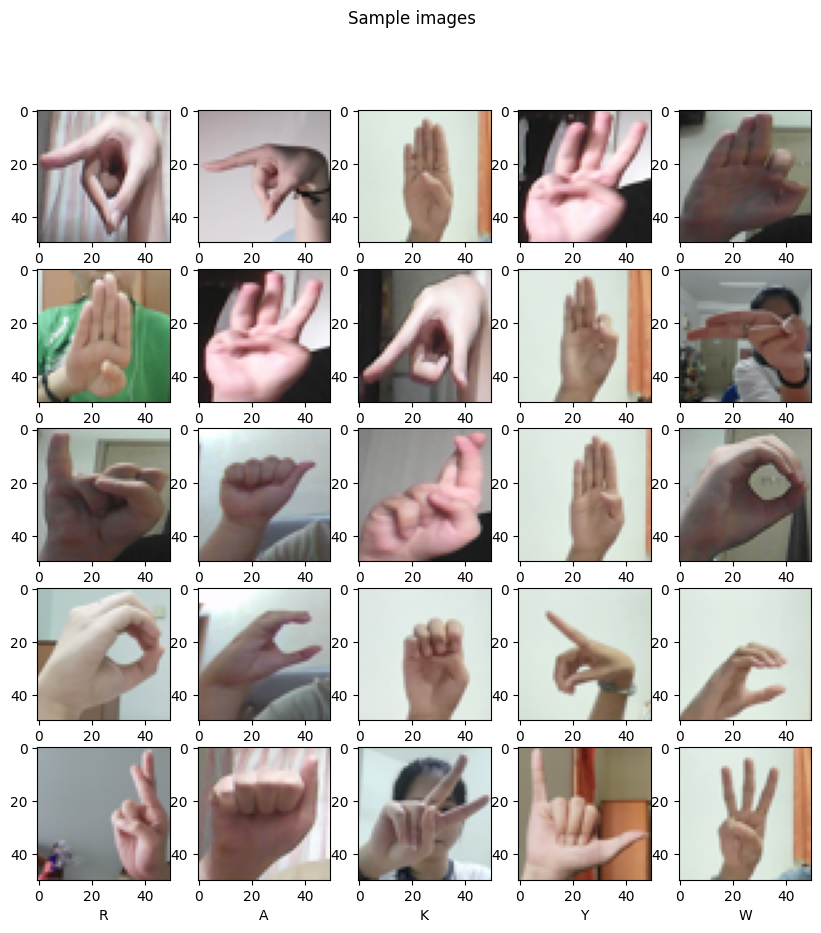

In [ ]:
fig = plt.figure(figsize = (10,10))
fig.suptitle('Sample images')
for i in range(25):
    plt.subplot(5,5,i+1)
#   plt.xticks =([])
#   plt.yticks = []
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1440, 50, 50, 3)
(1440,)
(480, 50, 50, 3)
(480,)


In [ ]:
x_train_flat = x_train.reshape(-1,50*50*3)
x_val_flat = x_val.reshape(-1,50*50*3)
x_test_flat = x_test.reshape(-1,50*50*3)

In [ ]:
print(x_train_flat.shape)
print(y_train.shape)
print(x_val_flat.shape)
print(y_val.shape)
print(x_test_flat.shape)
print(y_test.shape)

(1440, 7500)
(1440,)
(480, 7500)
(480,)
(480, 7500)
(480,)


# **Run with default parameter**

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(x_train_flat,y_train)


# make predictions on test set
y_pred=svc.predict(x_test_flat)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7875


# **Run with kernel='linear',C=100.0**

In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(x_train_flat, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(x_test_flat)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.8417


# **Run with kernel='poly',C=100.0**

In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(x_train_flat, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(x_test_flat)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.8375


# **Run with kernel='sigmoid',C=100.0**

In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(x_train_flat,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(x_test_flat)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.0333


# **Run with kernel='rbf',C=100.0**

In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(kernel='rbf',C=100.0) 


# fit classifier to training set
svc.fit(x_train_flat,y_train)


# make predictions on test set
y_pred=svc.predict(x_test_flat)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8667


# **Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [1, 10, 100],
    'kernel': ['rbf']
}

# Create the SVM model
svc=SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train_flat, y_train)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy')

In [ ]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model to make predictions
y_pred = best_model.predict(x_test_flat)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.8597222222222222
Accuracy: 0.8666666666666667


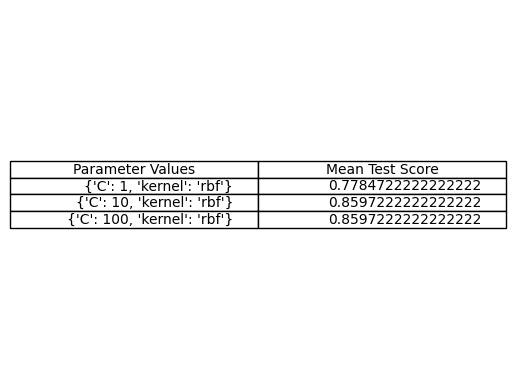

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the parameter values and mean test scores from the grid search results
param_values = grid_search.cv_results_['params']
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Create a DataFrame to store the data
data = pd.DataFrame({'Parameter Values': param_values, 'Mean Test Score': mean_test_scores})

# Plot the table graph
plt.table(cellText=data.values, colLabels=data.columns, loc='center')

# Customize the table appearance if needed
plt.axis('off')
plt.show()


#**Cross Validation Score**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
scores = cross_val_score(svc,x_train_flat,y_train,cv=5)

# Print the scores for each fold and the mean score
print("Scores:", scores)
print("Mean Score:", scores.mean())



Scores: [0.84375    0.87152778 0.86458333 0.875      0.84375   ]
Mean Score: 0.8597222222222222


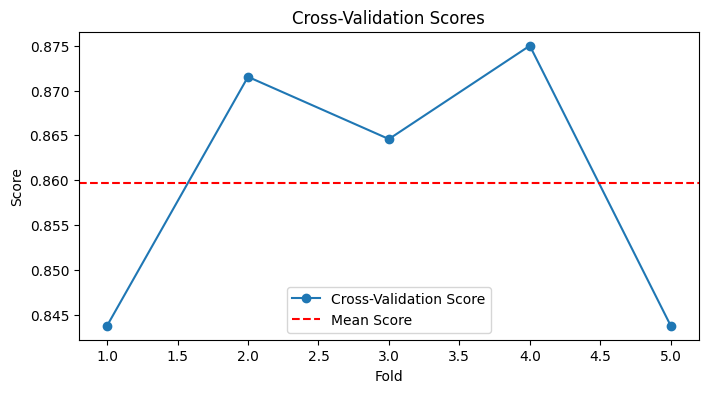

In [ ]:
# Plot the scores
plt.figure(figsize=(8, 4))
plt.plot(range(1, 6), scores, marker='o', linestyle='-', label='Cross-Validation Score')
plt.axhline(y=scores.mean(), color='r', linestyle='--', label='Mean Score')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross-Validation Scores')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

C_values = [0.1,1, 10, 100, 1000]

# Perform cross-validation with 5 folds
train_scores = []
val_scores = []

for C in C_values:
    svc = SVC(C=C)
    svc.fit(x_train_flat, y_train)
    
    # Calculate training accuracy
    y_train_pred = svc.predict(x_train_flat)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)
    
    # Perform cross-validation and calculate validation accuracy
    scores = cross_val_score(svc, x_train_flat, y_train, cv=5)
    val_accuracy = scores.mean()
    val_scores.append(val_accuracy)



Training Scores: [0.49930555555555556, 0.9451388888888889, 1.0, 1.0, 1.0]
Validation Scores: [0.325, 0.7784722222222222, 0.8597222222222222, 0.8597222222222222, 0.8597222222222222]


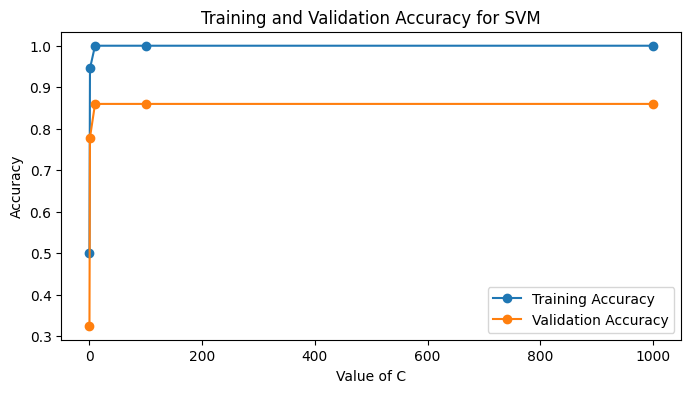

In [ ]:
# Print the training and validation scores
print("Training Scores:", train_scores)
print("Validation Scores:", val_scores)

# Plot the training and validation accuracy

plt.figure(figsize=(8, 4))
plt.plot(C_values, train_scores, marker='o', linestyle='-', label='Training Accuracy')
plt.plot(C_values, val_scores, marker='o', linestyle='-', label='Validation Accuracy')
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for SVM')
plt.legend()
plt.show()

#**Confusion Matrix**

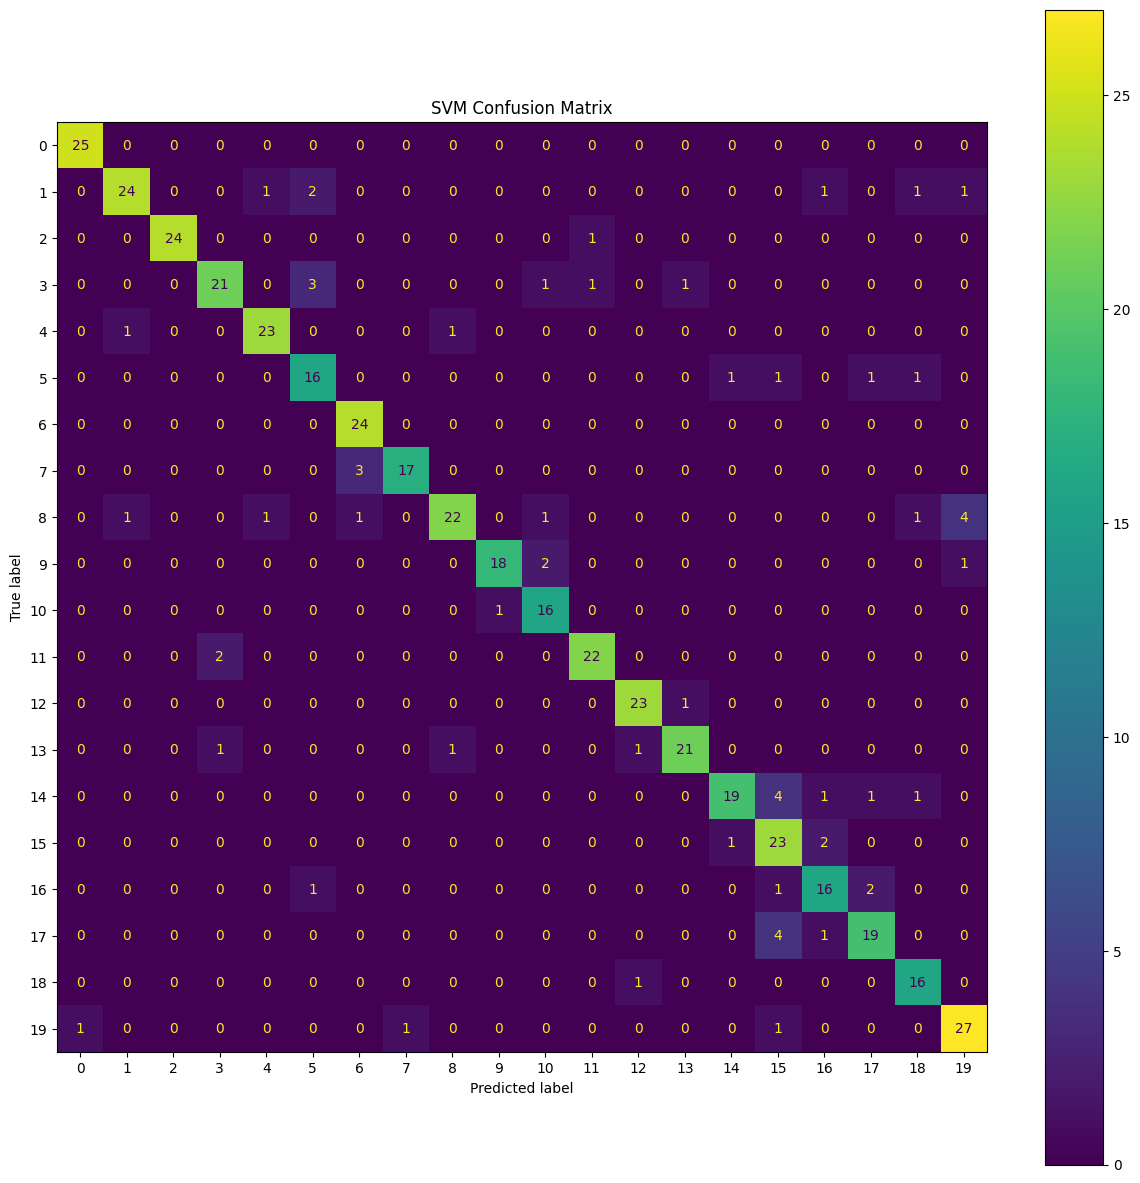

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred,labels = svc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=svc.classes_)

fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('SVM Confusion Matrix')
disp.plot(ax=ax)
plt.show()

In [ ]:
plt.savefig('/content/my_graph.png')


<Figure size 640x480 with 0 Axes>

#**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       0.92      0.80      0.86        30
           2       1.00      0.96      0.98        25
           3       0.88      0.78      0.82        27
           4       0.92      0.92      0.92        25
           5       0.73      0.80      0.76        20
           6       0.86      1.00      0.92        24
           7       0.94      0.85      0.89        20
           8       0.92      0.71      0.80        31
           9       0.95      0.86      0.90        21
          10       0.80      0.94      0.86        17
          11       0.92      0.92      0.92        24
          12       0.92      0.96      0.94        24
          13       0.91      0.88      0.89        24
          14       0.90      0.73      0.81        26
          15       0.68      0.88      0.77        26
          16       0.76      0.80      0.78        20
          17       0.83    

## **Predicted Result**

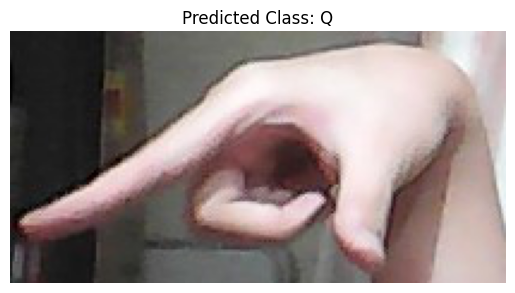

In [ ]:
import random

parent_folder = '/content/drive/MyDrive/Crop/'      
subfolders = [f.path for f in os.scandir(parent_folder) if f.is_dir()]
random_subfolder = random.choice(subfolders)
image_files = [f.path for f in os.scandir(random_subfolder) if f.is_file() and f.name.endswith(('.jpg', '.jpeg', '.png'))]

# Select a random image
random_image_path = random.choice(image_files)

# Open the random image
random_image = Image.open(random_image_path)

# Preprocess the image
random_image_c = random_image.convert('RGB')
random_image_c = random_image.resize(IMAGE_SIZE)
random_image_flat = np.array(random_image_c).reshape(-1,50*50*3)

# Classify the image using the trained SVC model
predicted_class_index = svc.predict(random_image_flat)[0]

# Determine the corresponding class name
predicted_class_name = class_names[predicted_class_index]

# Display the image and predicted class name
fig, ax = plt.subplots()

ax.imshow(random_image)
ax.set_title('Predicted Class: ' + predicted_class_name)
ax.axis('off')
plt.show()